<a href="https://colab.research.google.com/github/awang0551/SPE-DUPTS/blob/main/WITSML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import welly
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import numpy as np


In [ ]:
pip install welly

In [ ]:
#open mutil files and concat all togeter

path = r"/content/drive/MyDrive/Norway-StatoilHydro-15_$47$_9-F-5/1/log/1/2/1/"

preffiex = ['/00002.xml','/00003.xml']
master_df = pd.DataFrame()
for x in preffiex:
    WITSML_file = path + x
    with open(WITSML_file) as f:
        data = f.read()
    data_xml = BeautifulSoup(data, 'xml')
    log_names = data_xml.find_all('mnemonicList')
    unit_names = data_xml.find_all('unitList')
    header = [i + ' - ' + j for i, j in zip(log_names[0].string.split(","), unit_names[0].string.split(","))]
    data = data_xml.find_all('data')
    df = pd.DataFrame(columns=header, 
                  data=[row.string.split(',') for row in data])
    df = df.replace('', np.NaN)
    
    if x == 0:
        master_df = df
    else:
        master_df = pd.concat([master_df, df], sort = False)
print('Total Length of DataFrame: ' + str(len(master_df)))
master_df.head()

Total Length of DataFrame: 20000


,TIME - s,MTOA -,TVCA - m3,TCHR -,TV14 - m3,DBTM - m,UTMODE -,ANGXCRS -,TV04 - m3,Bit_RPM - rpm,UTSTAT -,TV05 - m3,TV11 - m3,G_NC4 -,SHKPK_RT -,RSDX - m/s,A28H_UNC_DH_ECO_RT -,DCHV -,HKLD - kkgf,P40H_UNC_DH_ECO_RT -,CRS_CNINC -,G_C1 -,TV10 - m3,SHKRATE_RT -,FVOC - m3,TV03 - m3,TV02 - m3,TV09 - m3,SHKTOT_RT -,GRMA_DH_ECO_RT -,DVER - m,DCHR -,TVA - m3,VIBLAT_RT -,STIS -,DRHB_DH_ECO_RT -,TTV2 - m3,TV01 - m3,TDH - degC,TVDE -,...,DHAP_DH_ECO_RT -,DCAV_DH_ECO_RT -,TV08 - m3,RPM - rpm,MDOA - g/cm3,SWOB - kkgf,RTMODE -,TV07 - m3,DMEA - m,SPM1 - 1/min,SPM3 - 1/min,BONB -,DCRNT -,BITRUN -,PASS_NAME -,TV12 - m3,ROP5 -,RTSTAT -,GASA - %,STICK_RT -,SPM2 - 1/min,G_C3 -,INCL_CONT_RT -,P28H_ECO_RT -,P40H_ECO_RT -,AZIM_CONT_RT -,CFIA - m3/min,CRPM_RT -,RSUX - m/s,TQA - kN.m,ROP - m/h,AJAM_MWD -,TRPM_RT -,UCAV_DH_ECO_RT -,SPPA - kPa,A40H_ECO_RT -,TFDES -,VIBX_RT -,TV06 - m3,BVEL -
0,2008-07-24T22:27:01.987Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Drilling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-07-24T22:27:05.011Z,12.9799994444445,-4.15000012594306,NaN,0.509999950733112,1380.2099608344,NaN,NaN,0.029999950340976,0,NaN,1.78999989878304,79.5000000450741,NaN,NaN,0.0151665432,NaN,NaN,72.3896518244777,NaN,NaN,NaN,81.6600036240531,NaN,-4.15000012594306,0.190000003467456,1.34000000771918,64.4899978632974,NaN,NaN,2614.4199218736,NaN,71.2600020786795,NaN,NaN,NaN,1.63999998809086,0.190000003467456,16.8099994444446,NaN,...,NaN,NaN,78.9100037244858,0,0.499999944387491,0,NaN,17.950000812913,2927.0700684288,0,0,NaN,NaN,4,Drilling,2.76000004200161,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0151665432,0.0100005131868924,3.0099999744,NaN,NaN,NaN,388.000012139453,NaN,NaN,NaN,67.3099974880064,NaN
2,2008-07-24T22:27:08.035Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Drilling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-07-24T22:27:08.986Z,12.9799994444445,-4.15000012594306,NaN,0.509999950733112,1380.2099608344,NaN,NaN,0.029999950340976,0,NaN,1.78999989878304,79.5000000450741,NaN,NaN,0.0151665432,NaN,NaN,72.3284712856121,NaN,NaN,NaN,81.6600036240531,NaN,-4.15000012594306,0.190000003467456,1.34000000771918,64.4899978632974,NaN,NaN,2614.4199218736,NaN,71.2600020786795,NaN,NaN,NaN,1.63999998809086,0.190000003467456,16.8099994444446,NaN,...,NaN,NaN,78.9100037244858,0,0.499999944387491,0,NaN,17.950000812913,2927.0700684288,0,0,NaN,NaN,NaN,NaN,2.76000004200161,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0151665432,0.0100005131868924,3.0099999744,NaN,NaN,NaN,379.999997673161,NaN,NaN,NaN,67.3099974880064,NaN
4,2008-07-24T22:27:10.973Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Drilling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I'm only reading 2 files for testing. 

In [ ]:
master_df.head(30)

,TIME - s,MTOA -,TVCA - m3,TCHR -,TV14 - m3,DBTM - m,UTMODE -,ANGXCRS -,TV04 - m3,Bit_RPM - rpm,UTSTAT -,TV05 - m3,TV11 - m3,G_NC4 -,SHKPK_RT -,RSDX - m/s,A28H_UNC_DH_ECO_RT -,DCHV -,HKLD - kkgf,P40H_UNC_DH_ECO_RT -,CRS_CNINC -,G_C1 -,TV10 - m3,SHKRATE_RT -,FVOC - m3,TV03 - m3,TV02 - m3,TV09 - m3,SHKTOT_RT -,GRMA_DH_ECO_RT -,DVER - m,DCHR -,TVA - m3,VIBLAT_RT -,STIS -,DRHB_DH_ECO_RT -,TTV2 - m3,TV01 - m3,TDH - degC,TVDE -,...,DHAP_DH_ECO_RT -,DCAV_DH_ECO_RT -,TV08 - m3,RPM - rpm,MDOA - g/cm3,SWOB - kkgf,RTMODE -,TV07 - m3,DMEA - m,SPM1 - 1/min,SPM3 - 1/min,BONB -,DCRNT -,BITRUN -,PASS_NAME -,TV12 - m3,ROP5 -,RTSTAT -,GASA - %,STICK_RT -,SPM2 - 1/min,G_C3 -,INCL_CONT_RT -,P28H_ECO_RT -,P40H_ECO_RT -,AZIM_CONT_RT -,CFIA - m3/min,CRPM_RT -,RSUX - m/s,TQA - kN.m,ROP - m/h,AJAM_MWD -,TRPM_RT -,UCAV_DH_ECO_RT -,SPPA - kPa,A40H_ECO_RT -,TFDES -,VIBX_RT -,TV06 - m3,BVEL -
0,2008-07-24T22:27:01.987Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Drilling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-07-24T22:27:05.011Z,12.9799994444445,-4.15000012594306,NaN,0.509999950733112,1380.2099608344,NaN,NaN,0.029999950340976,0,NaN,1.78999989878304,79.5000000450741,NaN,NaN,0.0151665432,NaN,NaN,72.3896518244777,NaN,NaN,NaN,81.6600036240531,NaN,-4.15000012594306,0.190000003467456,1.34000000771918,64.4899978632974,NaN,NaN,2614.4199218736,NaN,71.2600020786795,NaN,NaN,NaN,1.63999998809086,0.190000003467456,16.8099994444446,NaN,...,NaN,NaN,78.9100037244858,0,0.499999944387491,0,NaN,17.950000812913,2927.0700684288,0,0,NaN,NaN,4,Drilling,2.76000004200161,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0151665432,0.0100005131868924,3.0099999744,NaN,NaN,NaN,388.000012139453,NaN,NaN,NaN,67.3099974880064,NaN
2,2008-07-24T22:27:08.035Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Drilling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-07-24T22:27:08.986Z,12.9799994444445,-4.15000012594306,NaN,0.509999950733112,1380.2099608344,NaN,NaN,0.029999950340976,0,NaN,1.78999989878304,79.5000000450741,NaN,NaN,0.0151665432,NaN,NaN,72.3284712856121,NaN,NaN,NaN,81.6600036240531,NaN,-4.15000012594306,0.190000003467456,1.34000000771918,64.4899978632974,NaN,NaN,2614.4199218736,NaN,71.2600020786795,NaN,NaN,NaN,1.63999998809086,0.190000003467456,16.8099994444446,NaN,...,NaN,NaN,78.9100037244858,0,0.499999944387491,0,NaN,17.950000812913,2927.0700684288,0,0,NaN,NaN,NaN,NaN,2.76000004200161,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0151665432,0.0100005131868924,3.0099999744,NaN,NaN,NaN,379.999997673161,NaN,NaN,NaN,67.3099974880064,NaN
4,2008-07-24T22:27:10.973Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Drilling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008-07-24T22:27:13.997Z,12.9799994444445,-4.15000012594306,NaN,0.509999950733112,1380.2099608344,NaN,NaN,0.029999950340976,0,NaN,1.78999989878304,79.5000000450741,NaN,NaN,0.0151665432,NaN,NaN,72.4814303438464,NaN,NaN,NaN,81.6299973142199,NaN,-4.15000012594306,0.190000003467456,1.34000000771918,64.4899978632974,NaN,NaN,2614.4199218736,NaN,71.2600020786795,NaN,NaN,NaN,1.63999998809086,0.190000003467456,16.8099994444446,NaN,...,NaN,NaN,78.9100037244858,0,0.499999944387491,0,NaN,17.950000812913,2927.0700684288,0,0,NaN,NaN,4,Drilling,2.76000004200161,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0151665432,0.0100005131868924,3.0099999744,NaN,NaN,NaN,376.9999991430

In [ ]:
for i in master_df.columns.sort_values():
    print(f'{i}')

A28H_ECO_RT - 
A28H_UNC_DH_ECO_RT - 
A40H_ECO_RT - 
A40H_UNC_DH_ECO_RT - 
ACTC - unitless
AJAM_MWD - 
ANGLX - 
ANGXCRS - 
AZIM_CONT_RT - 
BITRUN - 
BONB - 
BPOS - m
BVEL - 
Bit_RPM - rpm
CFIA - m3/min
CHKP - kPa
CPPA - kPa
CRPM_RT - 
CRS_CNINC - 
DBTM - m
DBTV - 
DCAV_DH_ECO_RT - 
DCHM - 
DCHR - 
DCHV - 
DCRNT - 
DHAP_DH_ECO_RT - 
DHAT_DH_ECO_RT - 
DMEA - m
DRHB_DH_ECO_RT - 
DRTM - m
DVER - m
ECD_ECO_RT - 
FVOC - m3
GASA - %
GRMA_BHC_RT - 
GRMA_DH_ECO_RT - 
G_C1 - 
G_C2 - 
G_C3 - 
G_IC4 - 
G_IC5 - 
G_NC4 - 
G_NC5 - 
HKLD - kkgf
INCL_CONT_RT - 
MBOT - 
MDOA - g/cm3
MTOA - 
MWTI - g/cm3
P28H_ECO_RT - 
P28H_UNC_DH_ECO_RT - 
P40H_ECO_RT - 
P40H_UNC_DH_ECO_RT - 
PASS_NAME - 
ROP - m/h
ROP5 - 
RPM - rpm
RSDX - m/s
RSUX - m/s
RTMODE - 
RTSTAT - 
SDEP_CONT_RT - 
SHKL_DH_ECO_RT - 
SHKPK_RT - 
SHKRATE_RT - 
SHKRSK_RT - 
SHKTOT_RT - 
SHK_ISONIC_RT - 
SPM1 - 1/min
SPM2 - 1/min
SPM3 - 1/min
SPPA - kPa
STICK_RT - 
STIS - 
STKSLP - 
SWOB - kkgf
TCHR - 
TDH - degC
TF - 
TFDES - 
TFLO - L/min
TIME - s


In [ ]:
df=master_df[['TIME - s','DBTM - m','DVER - m','BPOS - m','SWOB - kkgf','HKLD - kkgf','ROP - m/h','RPM - rpm','SPPA - kPa','TQA - kN.m']]

In [ ]:
pd.set_option('display.max_rows',None )
df.head(30)

,TIME - s,DBTM - m,DVER - m,BPOS - m,SWOB - kkgf,HKLD - kkgf,ROP - m/h,RPM - rpm,SPPA - kPa,TQA - kN.m
0,2008-07-24T22:27:01.987Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-07-24T22:27:05.011Z,1380.2099608344,2614.4199218736,49.439998656,0,72.3896518244777,3.0099999744,0,388.000012139453,0.0100005131868924
2,2008-07-24T22:27:08.035Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-07-24T22:27:08.986Z,1380.2099608344,2614.4199218736,49.439998656,0,72.3284712856121,3.0099999744,0,379.999997673161,0.0100005131868924
4,2008-07-24T22:27:10.973Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008-07-24T22:27:13.997Z,1380.2099608344,2614.4199218736,49.439998656,0,72.4814303438464,3.0099999744,0,376.999999143058,0.0100005131868924
6,2008-07-24T22:27:17.021Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2008-07-24T22:27:17.971Z,1380.2099608344,2614.4199218736,49.439998656,0,72.4202420939105,3.0099999744,0,383.999991116792,0.0100005131868924
8,2008-07-24T22:27:19.958Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2008-07-24T22:27:22.982Z,1380.2099608344,2614.4199218736,49.439998656,0,72.4406405963817,3.0099999744,0,377.999994056588,0.0100005131868924


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TIME - s     20000 non-null  object
 1   DBTM - m     9707 non-null   object
 2   DVER - m     9707 non-null   object
 3   BPOS - m     9707 non-null   object
 4   SWOB - kkgf  9707 non-null   object
 5   HKLD - kkgf  9707 non-null   object
 6   ROP - m/h    9707 non-null   object
 7   RPM - rpm    9707 non-null   object
 8   SPPA - kPa   9707 non-null   object
 9   TQA - kN.m   9707 non-null   object
dtypes: object(10)
memory usage: 1.7+ MB


In [ ]:
for i in df.columns[1:]:
    df[i]=pd.to_numeric(df[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME - s     20000 non-null  object 
 1   DBTM - m     9707 non-null   float64
 2   DVER - m     9707 non-null   float64
 3   BPOS - m     9707 non-null   float64
 4   SWOB - kkgf  9707 non-null   float64
 5   HKLD - kkgf  9707 non-null   float64
 6   ROP - m/h    9707 non-null   float64
 7   RPM - rpm    9707 non-null   float64
 8   SPPA - kPa   9707 non-null   float64
 9   TQA - kN.m   9707 non-null   float64
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
import plotly.io as pio
pio.renderers.default='colab'

In [ ]:
import plotly.graph_objects as go


In [ ]:
def show_plot(df, fig_title):
    fig=px.line(title=fig_title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['TIME - s'], y=df[i], name=i)
    fig.show('colab')

In [ ]:
show_plot(df,'all data')

NameError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec6f4a0240>,
      dtype=object)

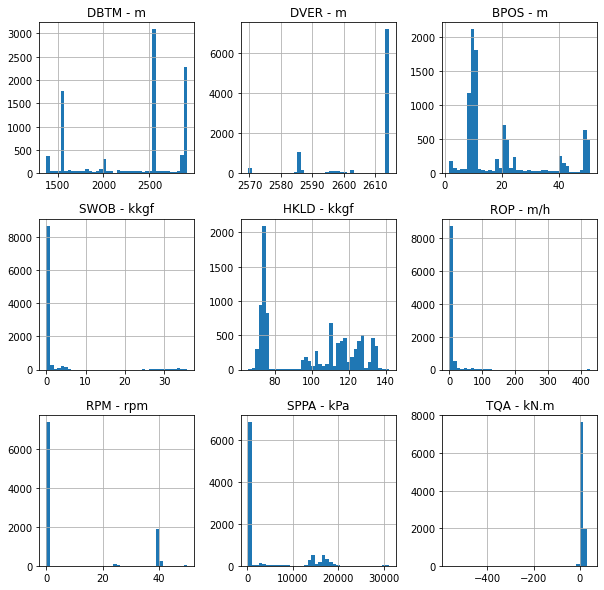

In [ ]:
df.hist(figsize=(10,10),bins=40)

In [ ]:
#if the row is all Nan, the drop it.
df.dropna(how='all',thresh=9,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head(50)

,TIME - s,DBTM - m,DVER - m,BPOS - m,SWOB - kkgf,HKLD - kkgf,ROP - m/h,RPM - rpm,SPPA - kPa,TQA - kN.m
1,2008-07-24T22:27:05.011Z,1380.209961,2614.419922,49.439999,0.0,72.389652,3.01,0.0,388.000012,0.010001
3,2008-07-24T22:27:08.986Z,1380.209961,2614.419922,49.439999,0.0,72.328471,3.01,0.0,379.999998,0.010001
5,2008-07-24T22:27:13.997Z,1380.209961,2614.419922,49.439999,0.0,72.481430,3.01,0.0,376.999999,0.010001
7,2008-07-24T22:27:17.971Z,1380.209961,2614.419922,49.439999,0.0,72.420242,3.01,0.0,383.999991,0.010001
9,2008-07-24T22:27:22.982Z,1380.209961,2614.419922,49.439999,0.0,72.440641,3.01,0.0,377.999994,0.010001
11,2008-07-24T22:27:27.043Z,1380.209961,2614.419922,49.439999,0.0,72.420242,3.01,0.0,390.000009,0.010001
13,2008-07-24T22:27:31.968Z,1380.209961,2614.419922,49.439999,0.0,72.359062,3.01,0.0,370.000007,0.010001
15,2008-07-24T22:27:36.029Z,1380.209961,2614.419922,49.439999,0.0,72.379460,3.01,0.0,382.999989,0.010001
17,2008-07-24T22:27:41.040Z,1380.209961,2614.419922,49.439999,0.0,72.450840,3.01,0.0,380.999993,0.010001
19,2008-07-24T22:27:45.014Z,1380.209961,2614.419922,49.439999,0.0,72.420242,3.01,0.0,385.999988,0.010001


In [ ]:
#after drop the rows have all Nan, all the missing value are dropped which mean at least in the time frame of the files(0002 and 0003), there's no missing value need to process

percent_missing = df.isnull().sum()*100/len(df)

missing_value_df = pd.DataFrame({'percent':percent_missing})
missing_value_df

,percent
TIME - s,0.0
DBTM - m,0.0
DVER - m,0.0
BPOS - m,0.0
SWOB - kkgf,0.0
HKLD - kkgf,0.0
ROP - m/h,0.0
RPM - rpm,0.0
SPPA - kPa,0.0
TQA - kN.m,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9707 entries, 1 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME - s     9707 non-null   object 
 1   DBTM - m     9707 non-null   float64
 2   DVER - m     9707 non-null   float64
 3   BPOS - m     9707 non-null   float64
 4   SWOB - kkgf  9707 non-null   float64
 5   HKLD - kkgf  9707 non-null   float64
 6   ROP - m/h    9707 non-null   float64
 7   RPM - rpm    9707 non-null   float64
 8   SPPA - kPa   9707 non-null   float64
 9   TQA - kN.m   9707 non-null   float64
dtypes: float64(9), object(1)
memory usage: 834.2+ KB


In [ ]:
df.describe()

,DBTM - m,DVER - m,BPOS - m,SWOB - kkgf,HKLD - kkgf,ROP - m/h,RPM - rpm,SPPA - kPa,TQA - kN.m
count,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000
mean,2326.446137,2607.496357,19.421185,0.954756,98.810619,6.650942,9.462133,4458.304526,3.717458
std,537.165376,12.573013,14.534341,4.811480,23.713030,16.612789,16.954627,6822.788477,12.789196
min,1380.030029,2569.540039,1.590000,0.000000,65.537158,1.170000,0.000000,195.000008,-562.440002
25%,1663.069946,2602.540039,9.440000,0.000000,73.552127,3.010000,0.000000,359.999989,0.020000
50%,2550.360107,2614.419922,10.840000,0.000000,102.236750,3.010000,0.000000,484.000013,0.020000
75%,2874.729980,2614.419922,23.580000,0.000000,120.550852,3.010000,0.000000,6697.499849,0.790000
max,2913.459961,2614.419922,51.020000,35.965391,141.801734,428.190003,50.290001,31085.998538,45.369999


In [ ]:
df['ROP - m/h'].shape[]

IndexError: ignored

In [ ]:
#isolation forest can be used as supervise and unsupervise. I'm applying it here as unsupervise to detect anomaly

from sklearn.ensemble import IsolationForest

In [ ]:
# test ROP

model=IsolationForest(n_estimators=10, max_samples=10000, contamination=float(0.01),max_features=1)
model.fit(df[['ROP - m/h']])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:281: UserWarning:

max_samples (10000) is greater than the total number of samples (9707). max_samples will be set to n_samples for estimation.



IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1, max_samples=10000, n_estimators=10, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

In [ ]:
df['scores']=model.decision_function(df[['ROP - m/h']])
df['anomaly']=model.predict(df[['ROP - m/h']])
df.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TIME - s,DBTM - m,DVER - m,BPOS - m,SWOB - kkgf,HKLD - kkgf,ROP - m/h,RPM - rpm,SPPA - kPa,TQA - kN.m,scores,anomaly,scores_TQA,anomaly_TQA
1,2008-07-24T22:27:05.011Z,1380.209961,2614.419922,49.439999,0.0,72.389652,3.01,0.0,388.000012,0.010001,0.252685,1,0.232486,1
3,2008-07-24T22:27:08.986Z,1380.209961,2614.419922,49.439999,0.0,72.328471,3.01,0.0,379.999998,0.010001,0.252685,1,0.232486,1
5,2008-07-24T22:27:13.997Z,1380.209961,2614.419922,49.439999,0.0,72.481430,3.01,0.0,376.999999,0.010001,0.252685,1,0.232486,1
7,2008-07-24T22:27:17.971Z,1380.209961,2614.419922,49.439999,0.0,72.420242,3.01,0.0,383.999991,0.010001,0.252685,1,0.232486,1
9,2008-07-24T22:27:22.982Z,1380.209961,2614.419922,49.439999,0.0,72.440641,3.01,0.0,377.999994,0.010001,0.252685,1,0.232486,1
11,2008-07-24T22:27:27.043Z,1380.209961,2614.419922,49.439999,0.0,72.420242,3.01,0.0,390.000009,0.010001,0.252685,1,0.232486,1
13,2008-07-24T22:27:31.968Z,1380.209961,2614.419922,49.439999,0.0,72.359062,3.01,0.0,370.000007,0.010001,0.252685,1,0.232486,1
15,2008-07-24T22:27:36.029Z,1380.209961,2614.419922,49.439999,0.0,72.379460,3.01,0.0,382.999989,0.010001,0.252685,1,0.232486,1
17,2008-07-24T22:27:41.040Z,1380.209961,2614.419922,49.439999,0.0,72.450840,3.01,0.0,380.999993,0.010001,0.252685,1,0.232486,1
19,2008-07-24T22:27:45.014Z,1380.209961,2614.419922,49.439999,0.0,72.420242,3.01,0.0,385.999988,0.010001,0.252685,1,0.232486,1


In [ ]:
df['anomaly'].value_counts()

 1    9611
-1      96
Name: anomaly, dtype: int64

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
print(anomaly)


                      TIME - s     DBTM - m  ...  scores_TQA  anomaly_TQA
5348  2008-07-25T08:12:41.040Z  2875.100098  ...    0.026388            1
5350  2008-07-25T08:12:45.014Z  2875.270020  ...    0.031148            1
5352  2008-07-25T08:12:50.026Z  2875.399902  ...    0.031956            1
5354  2008-07-25T08:12:54.000Z  2875.570068  ...    0.029362            1
5356  2008-07-25T08:12:59.011Z  2875.699951  ...    0.032511            1
5358  2008-07-25T08:13:02.986Z  2875.860107  ...    0.024570            1
5360  2008-07-25T08:13:07.997Z  2876.000000  ...    0.010216            1
5362  2008-07-25T08:13:11.971Z  2876.169922  ...    0.013994            1
5364  2008-07-25T08:13:16.982Z  2876.370117  ...    0.023083            1
5367  2008-07-25T08:13:25.968Z  2876.409912  ...    0.012504            1
5369  2008-07-25T08:13:30.029Z  2876.409912  ...    0.031778            1
5371  2008-07-25T08:13:35.040Z  2876.469971  ...    0.014145            1
5373  2008-07-25T08:13:39.014Z  2876.6

In [ ]:
len(anomaly)

96

In [ ]:
df.describe()

,DBTM - m,DVER - m,BPOS - m,SWOB - kkgf,HKLD - kkgf,ROP - m/h,RPM - rpm,SPPA - kPa,TQA - kN.m,scores,anomaly,scores_TQA,anomaly_TQA
count,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000,9707.000000
mean,2326.446137,2607.496357,19.421185,0.954756,98.810619,6.650942,9.462133,4458.304526,3.717458,0.222922,0.980220,0.161915,0.800556
std,537.165376,12.573013,14.534341,4.811480,23.713030,16.612789,16.954627,6822.788477,12.789196,0.066258,0.197919,0.116555,0.599288
min,1380.030029,2569.540039,1.590000,0.000000,65.537158,1.170000,0.000000,195.000008,-562.440002,-0.213512,-1.000000,-0.218339,-1.000000
25%,1663.069946,2602.540039,9.440000,0.000000,73.552127,3.010000,0.000000,359.999989,0.020000,0.252685,1.000000,0.051423,1.000000
50%,2550.360107,2614.419922,10.840000,0.000000,102.236750,3.010000,0.000000,484.000013,0.020000,0.252685,1.000000,0.232486,1.000000
75%,2874.729980,2614.419922,23.580000,0.000000,120.550852,3.010000,0.000000,6697.499849,0.790000,0.252685,1.000000,0.248446,1.000000
max,2913.459961,2614.419922,51.020000,35.965391,141.801734,428.190003,50.290001,31085.998538,45.369999,0.252685,1.000000,0.248446,1.000000


In [ ]:
import seaborn as sns

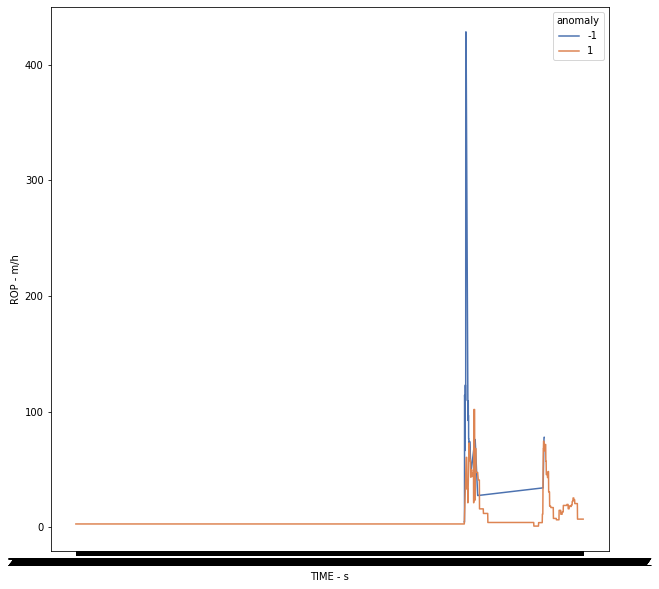

In [ ]:
#i'm trying to plot normal data and anomaly data together. as you can see the isolation forest detect anomaly based on its frequancy and value. 
#I think if we break the whole drilling into sub-category like drilling/reaming/tripping and then run isolation forest for each sub-category. We may have better chance to detect anomaly.

plt.figure(figsize=(10,10))
sns.lineplot(x='TIME - s',y='ROP - m/h',data=df,hue='anomaly',palette="deep",legend="full")

In [ ]:
#test TQA
model=IsolationForest(n_estimators=10, max_samples='auto', contamination=float(0.008),max_features=1.0)
model.fit(df[['TQA - kN.m']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.008,
                max_features=1.0, max_samples='auto', n_estimators=10,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
df['scores_TQA']=model.decision_function(df[['TQA - kN.m']])
df['anomaly_TQA']=model.predict(df[['TQA - kN.m']])
df.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TIME - s,DBTM - m,DVER - m,BPOS - m,SWOB - kkgf,HKLD - kkgf,ROP - m/h,RPM - rpm,SPPA - kPa,TQA - kN.m,scores_TQA,anomaly_TQA
1,2008-07-24T22:27:05.011Z,1380.209961,2614.419922,49.439999,0.0,72.389652,3.01,0.0,388.000012,0.010001,0.395021,1
3,2008-07-24T22:27:08.986Z,1380.209961,2614.419922,49.439999,0.0,72.328471,3.01,0.0,379.999998,0.010001,0.395021,1
5,2008-07-24T22:27:13.997Z,1380.209961,2614.419922,49.439999,0.0,72.481430,3.01,0.0,376.999999,0.010001,0.395021,1
7,2008-07-24T22:27:17.971Z,1380.209961,2614.419922,49.439999,0.0,72.420242,3.01,0.0,383.999991,0.010001,0.395021,1
9,2008-07-24T22:27:22.982Z,1380.209961,2614.419922,49.439999,0.0,72.440641,3.01,0.0,377.999994,0.010001,0.395021,1
11,2008-07-24T22:27:27.043Z,1380.209961,2614.419922,49.439999,0.0,72.420242,3.01,0.0,390.000009,0.010001,0.395021,1
13,2008-07-24T22:27:31.968Z,1380.209961,2614.419922,49.439999,0.0,72.359062,3.01,0.0,370.000007,0.010001,0.395021,1
15,2008-07-24T22:27:36.029Z,1380.209961,2614.419922,49.439999,0.0,72.379460,3.01,0.0,382.999989,0.010001,0.395021,1
17,2008-07-24T22:27:41.040Z,1380.209961,2614.419922,49.439999,0.0,72.450840,3.01,0.0,380.999993,0.010001,0.395021,1
19,2008-07-24T22:27:45.014Z,1380.209961,2614.419922,49.439999,0.0,72.420242,3.01,0.0,385.999988,0.010001,0.395021,1


In [ ]:
df['anomaly_TQA'].value_counts()

 1    9635
-1      72
Name: anomaly_TQA, dtype: int64

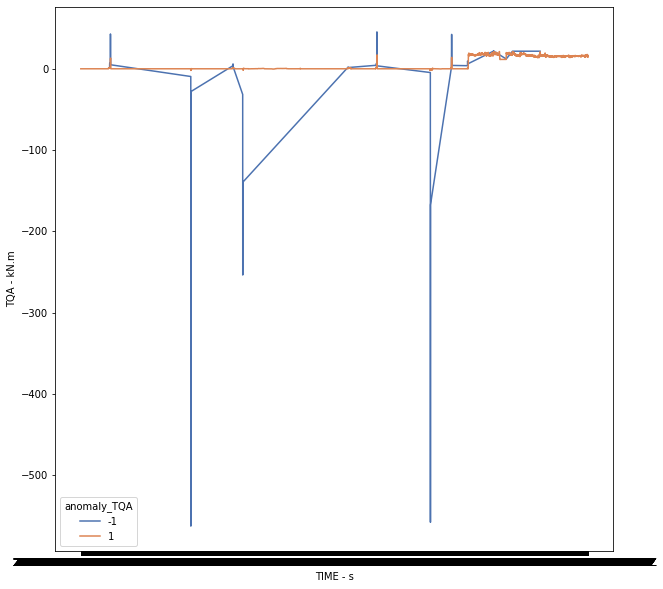

In [ ]:
# this plot is interesting. 

plt.figure(figsize=(10,10))
sns.lineplot(x='TIME - s',y='TQA - kN.m',data=df,hue='anomaly_TQA',palette="deep", legend="full")

In [ ]:
anomaly_TQA=df[df['anomaly_TQA']==-1]
anomaly_TQA.head(50)

,TIME - s,DBTM - m,DVER - m,BPOS - m,SWOB - kkgf,HKLD - kkgf,ROP - m/h,RPM - rpm,SPPA - kPa,TQA - kN.m,scores_TQA,anomaly_TQA
1145,2008-07-24T23:10:25.997Z,1540.650024,2614.419922,9.400000,0.0,75.632350,3.01,0.000000,319.000005,3.159999,-0.045069,-1
1147,2008-07-24T23:10:29.971Z,1540.650024,2614.419922,9.400000,0.0,75.459000,3.01,0.000000,305.999995,6.260000,-0.055462,-1
1149,2008-07-24T23:10:34.982Z,1540.650024,2614.419922,9.400000,0.0,75.193871,3.01,0.000000,294.000008,6.829999,-0.060712,-1
1151,2008-07-24T23:10:39.043Z,1540.650024,2614.419922,9.400000,0.0,75.132691,3.01,0.000000,299.000003,6.840000,-0.060712,-1
1153,2008-07-24T23:10:43.968Z,1540.650024,2614.419922,9.400000,0.0,75.377421,3.01,0.000000,302.999996,6.860000,-0.060712,-1
1155,2008-07-24T23:10:48.029Z,1540.650024,2614.419922,9.400000,0.0,75.030721,3.01,0.000000,330.999992,6.860000,-0.060712,-1
1157,2008-07-24T23:10:53.040Z,1540.650024,2614.419922,9.400000,0.0,74.938942,3.01,0.000000,306.999997,6.860000,-0.060712,-1
1159,2008-07-24T23:10:57.014Z,1540.650024,2614.419922,9.400000,0.0,74.653423,3.01,0.030000,302.999996,6.890000,-0.060712,-1
1161,2008-07-24T23:11:02.026Z,1540.650024,2614.419922,9.400000,0.0,74.826773,3.01,0.000000,311.999992,6.400000,-0.055462,-1
1163,2008-07-24T23:11:06.000Z,1540.650024,2614.419922,9.400000,0.0,74.765592,3.01,0.000000,326.999998,3.470000,-0.045069,-1
